In [1]:
import pandas as pd
import xarray as xr
import netCDF4 as nc  
import numpy as np
from datetime import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D, Conv3D, Flatten

In [2]:
# 1. Persiapan Data
# Load NetCDF data
rainfall_data = xr.open_dataset('Prate_CSFFull.nc')
Temperature_data = xr.open_dataset('suhuCFS.nc')
onset_Rainly_data = xr.open_dataset('Awal_Musim_Hujan_CHIRPS_NAN4.nc')

In [3]:
# Hitung curah hujan bulanan
data_monthly = rainfall_data.resample(time='M').sum(dim='time')
data_monthlyT = Temperature_data.resample(time='M').mean(dim='time')
rainy_season = onset_Rainly_data['AMH']

In [4]:
# Ekstraksi data untuk bulan September, Oktober, dan November
suhu_januari = data_monthlyT.sel(time=data_monthlyT['time.month'] == 1)['tmp2m']
suhu_februari = data_monthlyT.sel(time=data_monthlyT['time.month'] == 2)['tmp2m']
suhu_maret = data_monthlyT.sel(time=data_monthlyT['time.month'] == 3)['tmp2m']
suhu_april = data_monthlyT.sel(time=data_monthlyT['time.month'] == 4)['tmp2m']
suhu_mei = data_monthlyT.sel(time=data_monthlyT['time.month'] == 5)['tmp2m']
suhu_juni = data_monthlyT.sel(time=data_monthlyT['time.month'] == 6)['tmp2m']
suhu_juli = data_monthlyT.sel(time=data_monthlyT['time.month'] == 7)['tmp2m']
suhu_agustus = data_monthlyT.sel(time=data_monthlyT['time.month'] == 8)['tmp2m']
suhu_september = data_monthlyT.sel(time=data_monthlyT['time.month'] == 9)['tmp2m']
suhu_oktober = data_monthlyT.sel(time=data_monthlyT['time.month'] == 10)['tmp2m']
suhu_november = data_monthlyT.sel(time=data_monthlyT['time.month'] == 11)['tmp2m']
suhu_desember = data_monthlyT.sel(time=data_monthlyT['time.month'] == 12)['tmp2m']

suhu_januari = suhu_januari.groupby('time.year').mean()
suhu_februari = suhu_februari.groupby('time.year').mean()
suhu_maret = suhu_maret.groupby('time.year').mean()
suhu_april = suhu_april.groupby('time.year').mean()
suhu_mei = suhu_mei.groupby('time.year').mean()
suhu_juni=suhu_juni.groupby('time.year').mean()
suhu_juli=suhu_juli.groupby('time.year').mean()
suhu_agustus=suhu_agustus.groupby('time.year').mean()
suhu_september = suhu_september.groupby('time.year').mean()
suhu_oktober = suhu_oktober.groupby('time.year').mean()
suhu_november = suhu_november.groupby('time.year').mean()
suhu_desember = suhu_desember.groupby('time.year').mean()

In [5]:
# Ekstraksi data untuk bulan September, Oktober, dan November
rainfall_januari = data_monthly.sel(time=data_monthly['time.month'] == 1)['prate']
rainfall_februari = data_monthly.sel(time=data_monthly['time.month'] == 2)['prate']
rainfall_maret = data_monthly.sel(time=data_monthly['time.month'] == 3)['prate']
rainfall_april = data_monthly.sel(time=data_monthly['time.month'] == 4)['prate']
rainfall_mei = data_monthly.sel(time=data_monthly['time.month'] == 5)['prate']
rainfall_juni = data_monthly.sel(time=data_monthly['time.month'] == 6)['prate']
rainfall_juli = data_monthly.sel(time=data_monthly['time.month'] == 7)['prate']
rainfall_agustus = data_monthly.sel(time=data_monthly['time.month'] == 8)['prate']
rainfall_september = data_monthly.sel(time=data_monthly['time.month'] == 9)['prate']
rainfall_oktober = data_monthly.sel(time=data_monthly['time.month'] == 10)['prate']
rainfall_november = data_monthly.sel(time=data_monthly['time.month'] == 11)['prate']
rainfall_desember = data_monthly.sel(time=data_monthly['time.month'] == 12)['prate']

rainfall_januari = rainfall_januari.groupby('time.year').mean()
rainfall_februari = rainfall_februari.groupby('time.year').mean()
rainfall_maret = rainfall_maret.groupby('time.year').mean()
rainfall_april = rainfall_april.groupby('time.year').mean()
rainfall_mei = rainfall_mei.groupby('time.year').mean()
rainfall_juni=rainfall_juni.groupby('time.year').mean()
rainfall_juli=rainfall_juli.groupby('time.year').mean()
rainfall_agustus=rainfall_agustus.groupby('time.year').mean()
rainfall_september = rainfall_september.groupby('time.year').mean()
rainfall_oktober = rainfall_oktober.groupby('time.year').mean()
rainfall_november = rainfall_november.groupby('time.year').mean()
rainfall_desember = rainfall_desember.groupby('time.year').mean()

In [10]:
# Membuat dataset baru dengan ketiga variabel
combined_dataT = xr.Dataset({
    'TJanuari': suhu_januari,
    'TFebruari': suhu_februari,
    'TMaret': suhu_maret,
    'TApril' : suhu_april,
    'TMei' : suhu_mei,
    'TJuni': suhu_juni,
    'TJuli': suhu_juli,
    'TAgustus': suhu_agustus,
    'TSeptember': suhu_september,
    'TOktober': suhu_oktober,
    'TNovember': suhu_november,
    'TDesember': suhu_desember,
    'AMH' : rainy_season
})

In [11]:
# Membuat dataset baru dengan ketiga variabel
combined_data = xr.Dataset({
    'Januari': rainfall_januari,
    'Februari': rainfall_februari,
    'Maret': rainfall_maret,
    'April' : rainfall_april,
    'Mei' : rainfall_mei,
    'Juni': rainfall_juni,
    'Juli': rainfall_juli,
    'Agustus': rainfall_agustus,
    'September': rainfall_september,
    'Oktober': rainfall_oktober,
    'November': rainfall_november,
    'Desember': rainfall_desember,
    'TJanuari': suhu_januari,
    'TFebruari': suhu_februari,
    'TMaret': suhu_maret,
    'TApril' : suhu_april,
    'TMei' : suhu_mei,
    'TJuni': suhu_juni,
    'TJuli': suhu_juli,
    'TAgustus': suhu_agustus,
    'TSeptember': suhu_september,
    'TOktober': suhu_oktober,
    'TNovember': suhu_november,
    'TDesember': suhu_desember,
    'AMH' : rainy_season
})

In [12]:
MAM = rainfall_maret + rainfall_april + rainfall_mei
JJA = rainfall_juni + rainfall_juli + rainfall_agustus
SON = rainfall_september + rainfall_oktober + rainfall_november
DJF = rainfall_desember + rainfall_januari + rainfall_februari
TMAM = (suhu_maret + suhu_april + suhu_mei)/3
TJJA = (suhu_juni + suhu_juli + suhu_agustus)/3
TSON = (suhu_september + suhu_oktober + suhu_november)/3
TDJF = (suhu_desember + suhu_januari + suhu_februari)/3

In [13]:
TSON.isnull().sum()

<xarray.DataArray 'tmp2m' ()>
array(1760)

In [6]:
combined_JJA = xr.Dataset({
    'TJuni': suhu_juni,
    'TJuli': suhu_juli,
    'TAgustus': suhu_agustus,
    'Juni': rainfall_juni,
    'Juli': rainfall_juli,
    'Agustus': rainfall_agustus
    # 'AMH' : rainy_season
})

In [15]:
combined_data_musim = xr.Dataset({
    'JJA': JJA,
    'SON' : SON,
    'TMAM' : TMAM,
    'TJJA': TJJA,
    'AMH' : rainy_season
})

In [16]:
combined_data_JJASON = xr.Dataset({
    'Juni': rainfall_juni,
    'Juli': rainfall_juli,
    'Agustus': rainfall_agustus,
    'September': rainfall_september,
    'Oktober': rainfall_oktober,
    'November': rainfall_november,
    'AMH' : rainy_season
})

In [7]:
combined_JJA.to_netcdf('JJA0.25.nc')

In [8]:
# 1. Persiapan Data
# Load NetCDF data
# rainfall_data = xr.open_dataset('Prate_CSFFull.nc')
Tch_data = xr.open_dataset('regridTdanch.nc')
onset_Rainly_data = xr.open_dataset('AMHfull.nc')

In [10]:
combined_JJA = xr.Dataset({
    'TJuni': Tch_data['TJuni'],
    'TJuli': Tch_data['TJuli'],
    'TAgustus': Tch_data['TAgustus'],
    'Juni': Tch_data['Juni'],
    'Juli': Tch_data['Juli'],
    'Agustus': Tch_data['Agustus'],
    'AMH' : onset_Rainly_data['AMH']
})

In [11]:
combined_JJA.to_netcdf('Data05FIXXXXX.nc')

In [17]:
import numpy as np
import xarray as xr
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout

# ds = combined_data
ds = combined_data_bulan_musim
# Ubah dataset menjadi dataframe
ds_stacked = ds.stack(z=("latitude","longitude"))


In [14]:
start_date = "1981"
end_date = "2023"
rr = combined_JJA.sel(year=slice(start_date, end_date), latitude=slice(-4.625,5.125),longitude=slice(108.375,119.125))

In [15]:
#Convert to dataframe -- then this can be exported to a CSV if you want that
rr1 = rr.to_dataframe()
# View just the first 5 rows of the data

In [16]:
df = pd.DataFrame(rr1) 
corr_matrix = df.corr()


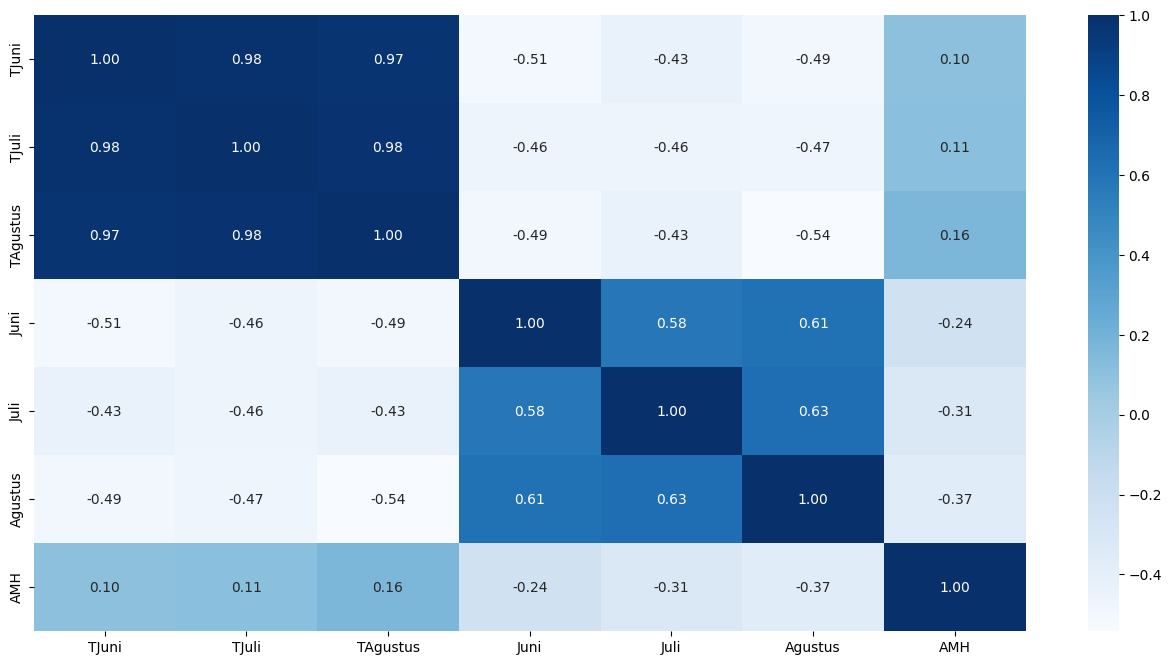

In [17]:
import seaborn as sns
plt.figure(figsize=(16, 8))  # Mengatur ukuran plot
sns.heatmap(corr_matrix,  # Masukkan matriks korelasi
            cmap='Blues',  # Pilih palet warna (opsi default: 'viridis')
            annot=True,  # Tampilkan nilai korelasi di setiap kotak
            fmt='.2f',  # Format nilai korelasi (misalnya: '.2f' untuk dua desimal)
           )
plt.show()  # Tampilkan heatmap


FIXX KEKNYA BENER BISMILLAH

In [136]:
import numpy as np
import pandas as pd
import xarray as xr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load data (gantilah dengan path dan nama variabel yang sesuai)
ds = xr.open_dataset("Musim_TR_NAN_FIX.nc")
# data_variable = ds[['Juni','Juli','Agustus','September', 'Oktober', 'November', 'AMH']].to_array().values  # Gantilah 'your_variable' dengan nama variabel yang sesuai
# data = np.array(data_variable).transpose(1, 2, 3, 0)  # Transpose untuk mendapatkan shape (time, lat, lon, vars)

# Extract variables
var1 = ds['Juni'].values
var2 = ds['Juli'].values
var3 = ds['Agustus'].values
var4 = ds['September'].values
var5 = ds['Oktober'].values
var6 = ds['November'].values
var7 = ds['TJuni'].values
var8 = ds['TJuli'].values
var9 = ds['TAgustus'].values
var10 = ds['TMAM'].values
var11 = ds['TJJA'].values
var12 = ds['JJA'].values
var13 = ds['SON'].values
var14 = ds['AMH'].values


# Buat mask untuk grid NaN pada variabel keempat
mask_nan_var7 = np.isnan(var14)
# median_value= np.nanmedian(var14)
# var14[np.isnan(var14)] = median_value

# Apply mask to the other variables
var1[mask_nan_var7] = np.nan
var2[mask_nan_var7] = np.nan
var3[mask_nan_var7] = np.nan
var4[mask_nan_var7] = np.nan
var5[mask_nan_var7] = np.nan
var6[mask_nan_var7] = np.nan
var7[mask_nan_var7] = np.nan
var8[mask_nan_var7] = np.nan
var9[mask_nan_var7] = np.nan
var10[mask_nan_var7] = np.nan
var11[mask_nan_var7] = np.nan
var12[mask_nan_var7] = np.nan
var13[mask_nan_var7] = np.nan

In [137]:
# Stack variables along a new axis (features axis)
# data = np.stack([var1, var2, var3, var4, var5, var6, var7, var8, var9, var14], axis=-1)
data = np.stack([var1, var2, var3, var7, var8, var9, var14], axis=-1)
# data = np.stack([var10, var11, var12, var13,var14], axis=-1)

# Mengganti nilai NaN dengan nilai khusus (misalnya -9999)
nan_mask = np.isnan(data)
data_with_mask = np.nan_to_num(data, nan=0)

# Split data into predictors and target
predictors = data_with_mask[..., :-1]  # All variables except the last one
target = data_with_mask[..., -1]  # The last variable is the target

In [138]:
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

In [139]:
# Normalisasi data
scaler_x = MinMaxScaler()
predictors_normalized = scaler_x.fit_transform(predictors.reshape(-1, predictors.shape[-1]))

scaler_y = MinMaxScaler()
target_normalized = scaler_y.fit_transform(target.reshape(-1, 1)).reshape(target.shape)

In [140]:
from sklearn.decomposition import PCA

# Bentuk data untuk CNN (samples, height, width, channels)
X = predictors_normalized
# target_normalized = target_normalized.reshape(-1)

pca=PCA(0.99)
predictors_pca = pca.fit_transform(X)
predictors_pca= predictors_pca.reshape(43,40,44,predictors_pca.shape[1])
# # Split data into train and test sets
# X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(predictors_pca, y, test_size=0.302325,shuffle=False)
# X_train_scaled = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
# X_test_scaled = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [141]:
# # Prepare data for LSTM with time steps
n_steps = 1  # Using data from one year to predict the next year
# Create sequences of data
X = []
y = []

for i in range(len(predictors_pca) - n_steps):
    for lat in range(predictors_pca.shape[1]):
        for lon in range(predictors_pca.shape[2]):
            X.append(predictors_pca[i:i+n_steps, lat, lon, :])
            y.append(target_normalized[i+n_steps, lat, lon])

X = np.array(X)
y = np.array(y)

# Reshape data for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], n_steps,X.shape[2]))

In [197]:
X_train.shape

(52801, 1, 3)

In [198]:
# # Reshape data for LSTM (samples, time steps, features)
# X = X.reshape((X.shape[0], n_steps, X.shape[4] * X.shape[3] * X.shape[2]))
# y = y.reshape((y.shape[0], y.shape[1] * y.shape[2]))
# Split data into train and test sets
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.285714, shuffle=False, random_state=42)


In [53]:
# X = X.reshape((X.shape[0], n_steps, X.shape[2]))
# X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.302325,shuffle=False)

(52799, 1, 3)

In [219]:
from keras.optimizers import Adam
from keras.layers import Bidirectional, LSTM
model = Sequential([
    LSTM(32, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    BatchNormalization(),
    
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.5),
    BatchNormalization(),

    Dense(128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(1, activation='linear')
])
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Use EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [97]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Use EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [220]:
# Train the model LSTM
history = model.fit(X_train, y_train_scaled, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])   
# history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
660/660 [==============================] - 113s 14ms/step - loss: 0.2457 - mae: 0.2035 - val_loss: 0.0351 - val_mae: 0.1043
Epoch 2/100
660/660 [==============================] - 5s 8ms/step - loss: 0.0248 - mae: 0.0967 - val_loss: 0.0133 - val_mae: 0.0609
Epoch 3/100
660/660 [==============================] - 4s 7ms/step - loss: 0.0172 - mae: 0.0902 - val_loss: 0.0096 - val_mae: 0.0553
Epoch 4/100
660/660 [==============================] - 5s 8ms/step - loss: 0.0168 - mae: 0.0913 - val_loss: 0.0108 - val_mae: 0.0647
Epoch 5/100
660/660 [==============================] - 5s 7ms/step - loss: 0.0162 - mae: 0.0906 - val_loss: 0.0105 - val_mae: 0.0696
Epoch 6/100
660/660 [==============================] - 6s 9ms/step - loss: 0.0158 - mae: 0.0905 - val_loss: 0.0093 - val_mae: 0.0539
Epoch 7/100
660/660 [==============================] - 6s 9ms/step - loss: 0.0156 - mae: 0.0895 - val_loss: 0.0101 - val_mae: 0.0701
Epoch 8/100
660/660 [==============================] - 5s 8ms/step

In [214]:
# Evaluate the model
loss = model.evaluate(X_test, y_test_scaled)
print(f'Test Loss: {loss}')

660/660 [==============================] - 11s 4ms/step - loss: 0.0102 - mae: 0.0826
Test Loss: [0.010216837748885155, 0.08261266350746155]


In [215]:
# Make predictions
predictions = model.predict(X_test)

660/660 [==============================] - 15s 5ms/step


In [216]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
# Denormalize predictions and actual values
predictions_denormalized = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
y_test_denormalized = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(y_test_scaled.shape)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_denormalized.flatten(), predictions_denormalized.flatten()))
print(f'RMSE: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test_denormalized.flatten(), predictions_denormalized.flatten())
print(f'R^2: {r2}')

# Calculate Pearson correlation coefficient (r)
correlation_coefficient, _ = pearsonr(y_test_denormalized.flatten(), predictions_denormalized.flatten())
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')

mape = mean_absolute_percentage_error(y_test_denormalized.flatten(), predictions_denormalized.flatten())
print(f'MAPE: {mape}')

# # Mask out zero values in y_test_denormalized
# non_zero_mask = y_test_scaled != 0

# # Filter predictions and actual values based on the mask
# filtered_predictions = predictions_denormalized[non_zero_mask]
# filtered_y_test = y_test_denormalized[non_zero_mask]

# # Calculate MAPE using the filtered data
# mape = np.mean(np.abs((filtered_y_test - filtered_predictions) / filtered_y_test)) * 100
# print(f'MAPE:{mape:.2f}%')

RMSE: 32.03868691253857
R^2: 0.9472615242059851
Pearson Correlation Coefficient: 0.9787349436305877
MAPE: 3.5296483127214376e+16


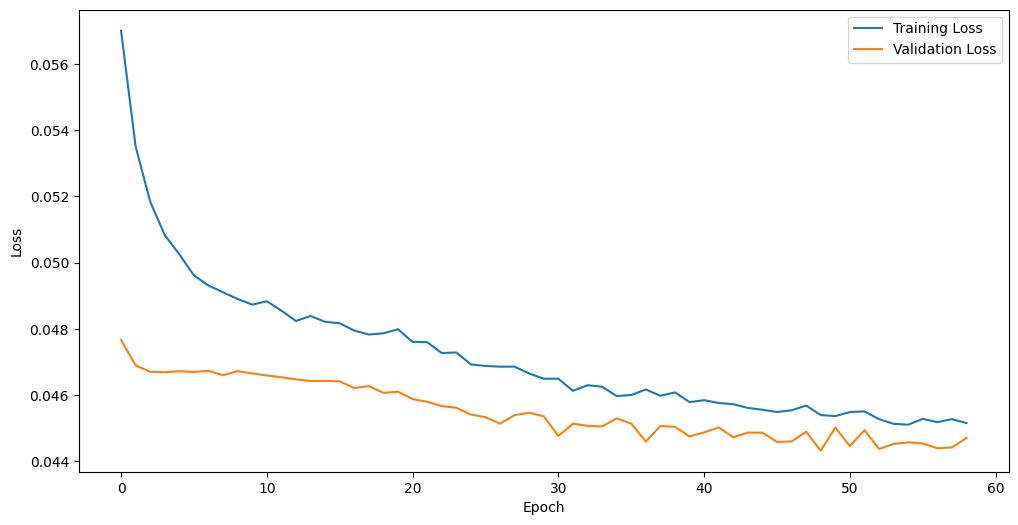

In [59]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [106]:
predictions_denormalized.shape

(22880, 1)

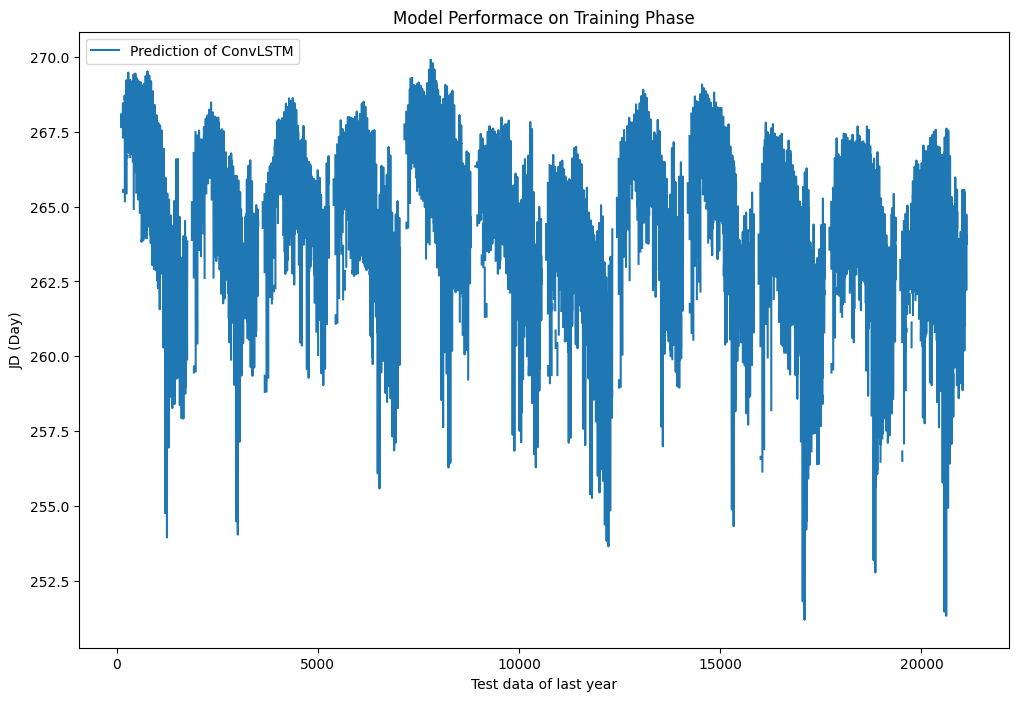

In [217]:
# Mengganti nilai di bawah 0 menjadi NaN
predictions_denormalized[predictions_denormalized < 100] = np.nan
y_test_denormalized[y_test_denormalized < 100] = np.nan

import matplotlib.pyplot as plt
#See the model performance on test dataset
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(predictions_denormalized, label='Prediction of ConvLSTM')
# plt.plot(y_test_denormalized, label='Actual value')
plt.legend(loc ="upper left")
plt.title('Model Performace on Training Phase')
plt.xlabel('Test data of last year')
plt.ylabel('JD (Day)')
plt.show()

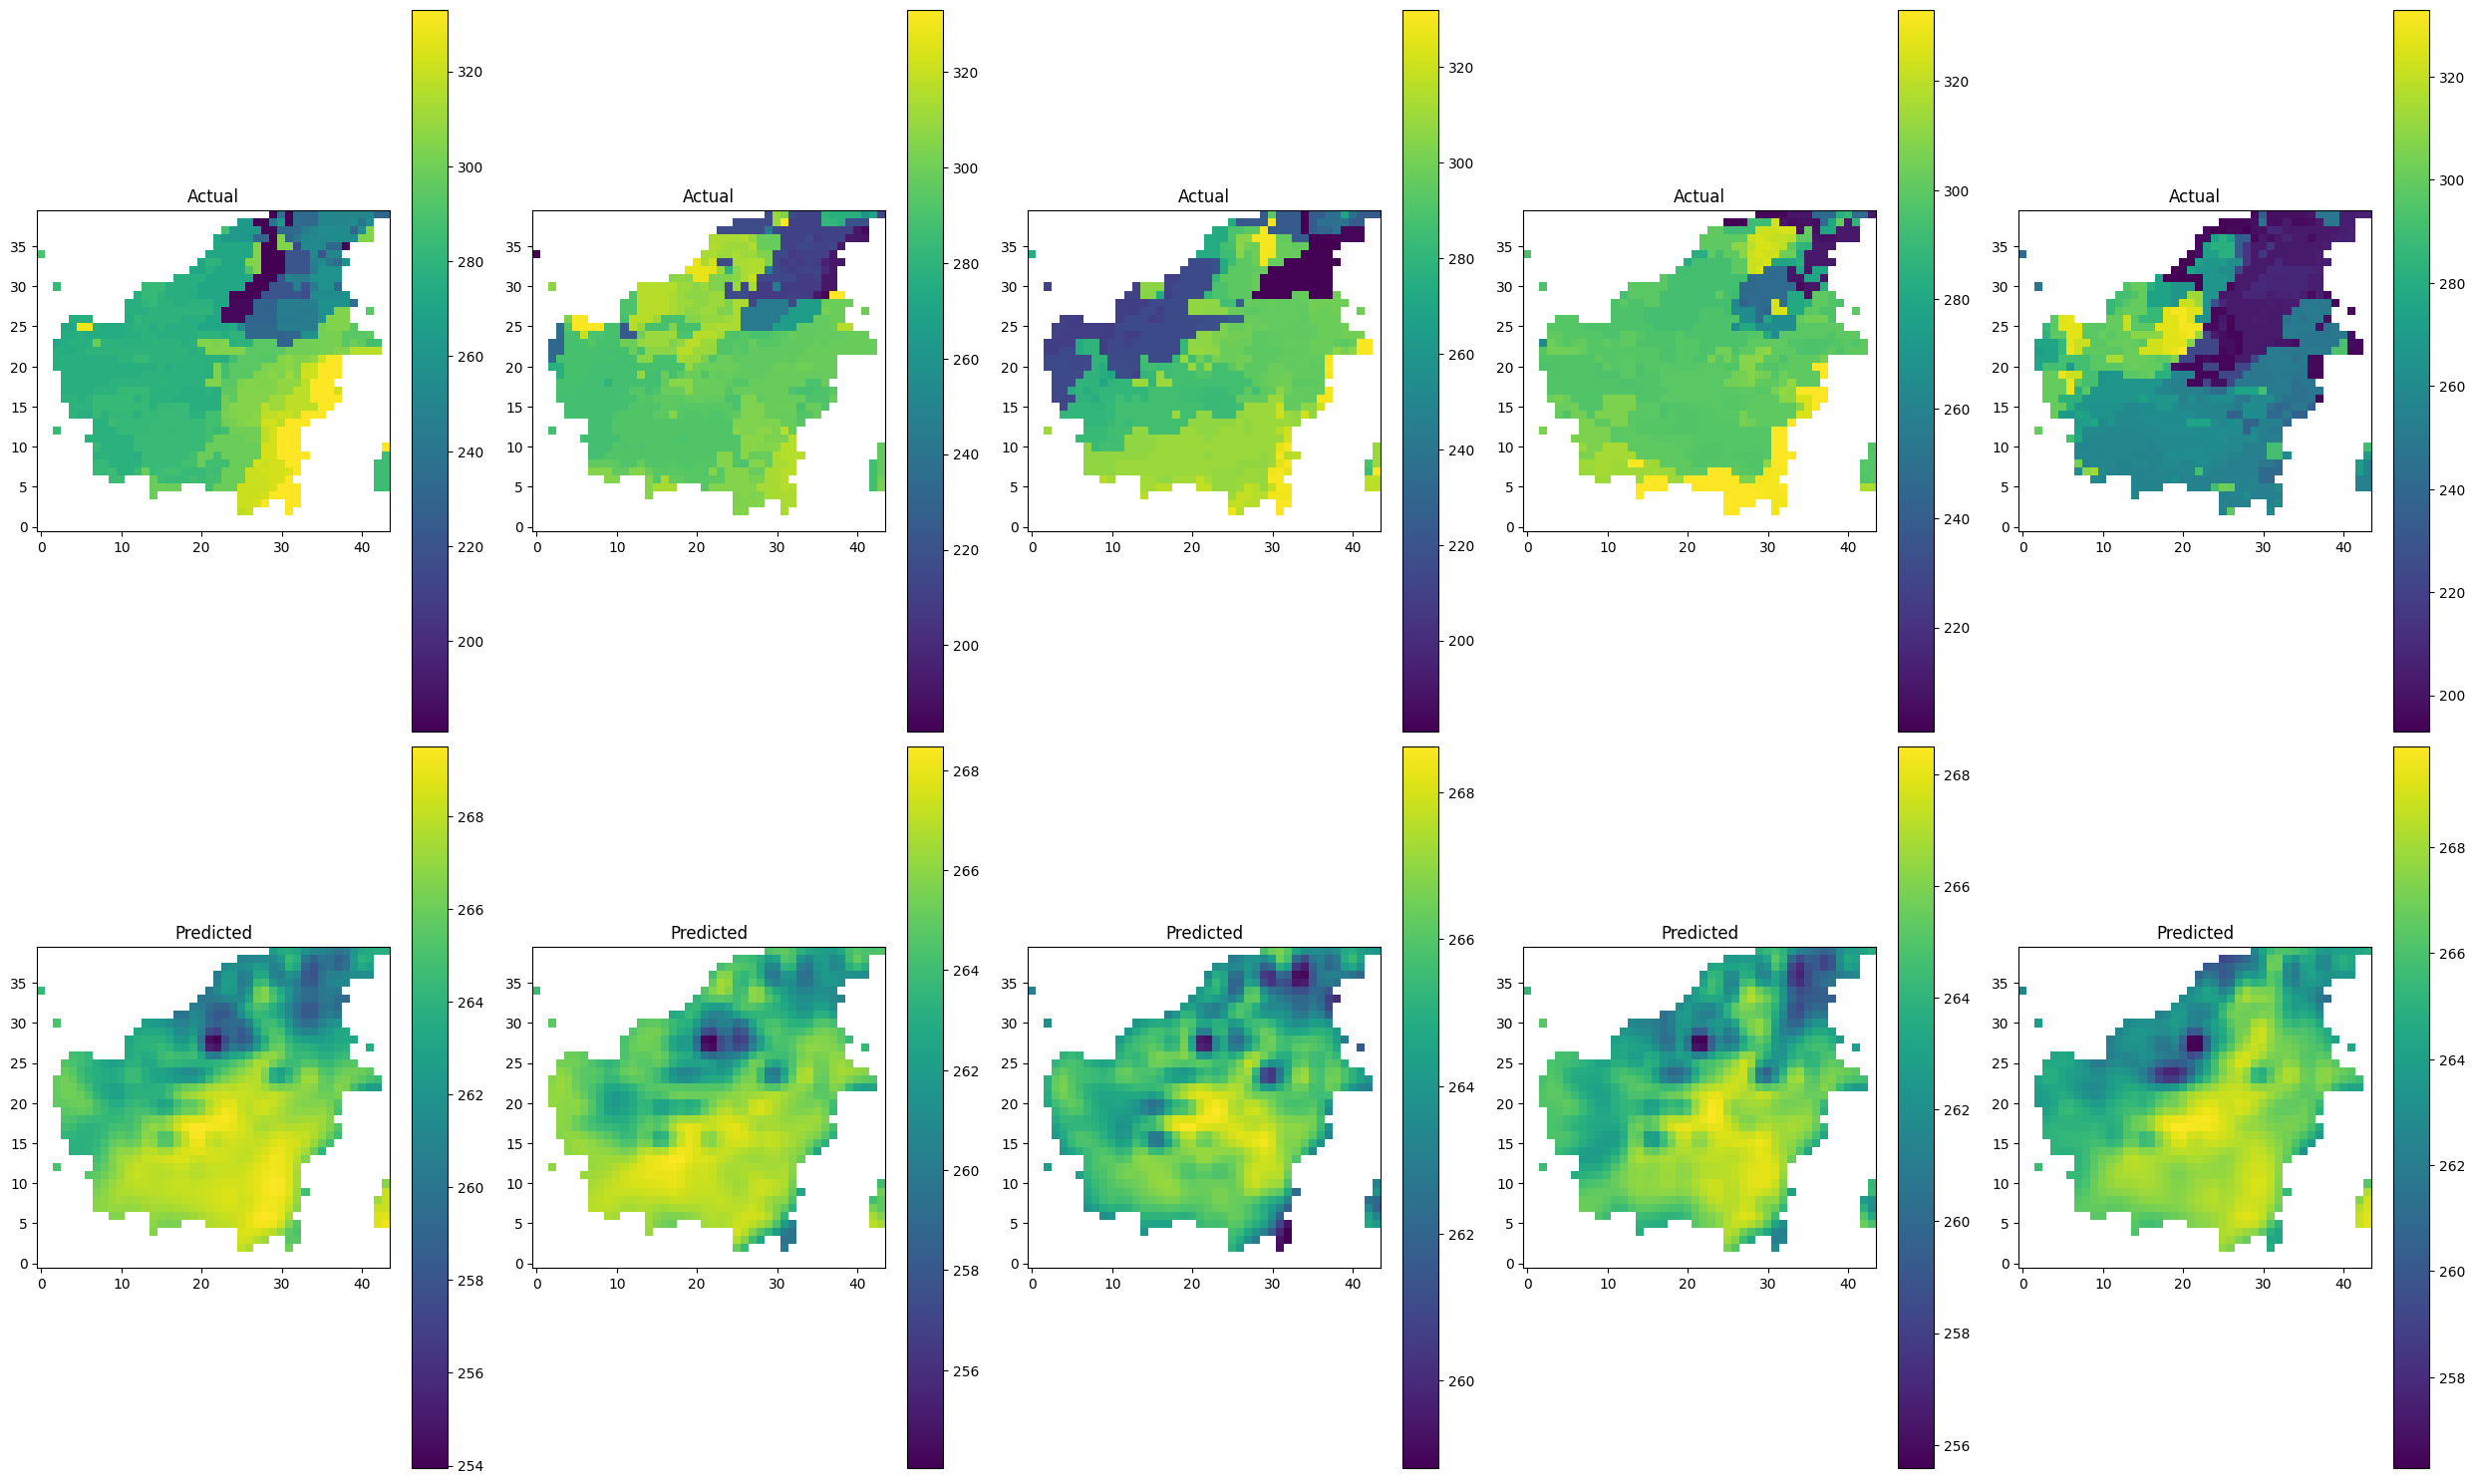

In [222]:
y_test_denormalized = y_test_denormalized.reshape(12,40,44)
predictions_denormalized = predictions_denormalized.reshape(12,40,44)

n_samples_to_plot = 5
plt.figure(figsize=(25, 15))
for i in range(n_samples_to_plot):
    plt.subplot(2, n_samples_to_plot, i + 1)
    plt.imshow(y_test_denormalized[i, :, :], cmap='viridis')
    plt.title('Actual')
    plt.colorbar()
    plt.gca().invert_yaxis()
    
    plt.subplot(2, n_samples_to_plot, n_samples_to_plot + i + 1)
    plt.imshow(predictions_denormalized[i, :, :], cmap='viridis')
    plt.title('Predicted')
    plt.colorbar()
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [96]:
import numpy as np
import xarray as xr
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Load data
ds = xr.open_dataset("CFSJanuari.nc")

# # Ambil variabel curah hujan bulanan dan suhu udara bulanan sebagai prediktor
# rain_september = ds['Juni'].values
# rain_oktober = ds['Juli'].values
# rain_november = ds['Agustus'].values

# temp_september = ds['TJuni'].values
# temp_oktober = ds['TJuli'].values
# temp_november = ds['TAgustus'].values

# # Ambil variabel awal musim hujan sebagai target
# early_rain_season = ds['AMH'].values

# early_rain_season = np.nan_to_num(early_rain_season, nan=np.nanmedian(early_rain_season))

# # Bentuk data menjadi (year, lat, lon, vars)
# data = np.stack([rain_september, rain_oktober, rain_november, temp_september, temp_oktober, temp_november], axis=-1)

# Extract variables
var1 = ds['Juni'].values
var2 = ds['Juli'].values
var3 = ds['Agustus'].values
# var4 = ds['September'].values
# var5 = ds['Oktober'].values
# var6 = ds['November'].values
var7 = ds['TJuni'].values
var8 = ds['TJuli'].values
var9 = ds['TAgustus'].values
# var10 = ds['TMAM'].values
# var11 = ds['TJJA'].values
# var12 = ds['JJA'].values
# var13 = ds['SON'].values
var14 = ds['AMH'].values

# # Buat mask untuk grid NaN pada variabel keempat
# mask_nan_var7 = np.isnan(var14)
median_value= np.nanmedian(var14)
var14[np.isnan(var14)] = median_value


# # # Apply mask to the other variables
# var1[mask_nan_var7] = np.nan
# var2[mask_nan_var7] = np.nan
# var3[mask_nan_var7] = np.nan
# var4[mask_nan_var7] = np.nan
# var5[mask_nan_var7] = np.nan
# var6[mask_nan_var7] = np.nan
# var7[mask_nan_var7] = np.nan
# var8[mask_nan_var7] = np.nan
# var9[mask_nan_var7] = np.nan
# var10[mask_nan_var7] = np.nan
# var11[mask_nan_var7] = np.nan
# var12[mask_nan_var7] = np.nan
# var13[mask_nan_var7] = np.nan
# # Stack variables along a new axis (features axis)
# data = np.stack([var1, var2, var3, var4, var5, var6, var7, var8, var9, var14], axis=-1)
data = np.stack([var1, var2, var3, var7, var8, var9, var14], axis=-1)
# data = np.stack([var10, var11, var12, var13,var14], axis=-1)


# # Mengganti nilai NaN dengan nilai khusus (misalnya -9999)
# nan_mask = np.isnan(data)
# data_with_mask = np.nan_to_num(data, nan=0)

# # Split data into predictors and target
# predictors = data_with_mask[...,:-1]  # All variables except the last one
# target = data_with_mask[..., -1] 

# Split data into predictors and target
predictors = data[...,:-1]  # All variables except the last one
target = data[..., -1] 




# Normalisasi data prediktor dan target
scaler_x = MinMaxScaler()
data_reshaped = predictors.reshape(-1, predictors.shape[-1])
data_normalized = scaler_x.fit_transform(data_reshaped).reshape(predictors.shape)

scaler_y = MinMaxScaler()
target_reshaped = target.reshape(-1, 1)
target_normalized = scaler_y.fit_transform(target_reshaped).reshape(target.shape)

# Apply PCA to predictors
n_components = 0.97
pca = PCA(n_components=n_components)
data_flattened = data_normalized.reshape(-1, data_normalized.shape[3])
data_pca = pca.fit_transform(data_flattened)
data_pca = data_pca.reshape(data_normalized.shape[0], data_normalized.shape[1], data_normalized.shape[2], -1)
data_pca = data_pca.reshape(-1, data_pca.shape[3])
# # Prepare data for LSTM with time steps
n_steps = 1  # Using data from two years to predict the next year
data_pca = data_pca.reshape(42*196*216, n_steps, data_pca.shape[1])
target_normalized = target_normalized.reshape(-1)
# # Create sequences of data
# X = []
# y = []

# for i in range(len(data_pca) - n_steps):
#     for lat in range(data_pca.shape[1]):
#         for lon in range(data_pca.shape[2]):
#             X.append(data_pca[i:i+n_steps, lat, lon, :])
#             y.append(target_normalized[i+n_steps, lat, lon])

# X = np.array(X)
# y = np.array(y)

# # Reshape data for LSTM (samples, time steps, features)
# X = X.reshape((X.shape[0], n_steps, X.shape[2]))

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2682926, shuffle=False)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.285714, shuffle=False)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3095238095, shuffle=False)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2926829268, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(data_pca, target_normalized, test_size=0.285714, shuffle=False)

In [47]:
import numpy as np
import xarray as xr
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Input, ConvLSTM2D, Concatenate, BatchNormalization, Dropout, Conv2D, Conv3D, SpatialDropout3D, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.decomposition import PCA 
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import mean_squared_error
from keras.callbacks import EarlyStopping
# Bangun model ConvLSTM
model = Sequential()

# Layer ConvLSTM
model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), input_shape=(1, 196, 216, X_train.shape[4]), return_sequences=True, padding='same', activation='tanh', kernel_regularizer=l2(0.08)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), return_sequences=True, padding='same', activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), return_sequences=False, padding='same', activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Layer output Conv2D
model.add(Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid', padding='same'))

# Kompilasi model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Use EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [6]:
import numpy as np
import xarray as xr
import keras as ks
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping

# Load data
ds = xr.open_dataset("CFSMei.nc", decode_times=False)


# Set global seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Extract variables
var1 = ds['Juni'].values
var2 = ds['Juli'].values
var3 = ds['Agustus'].values
var7 = ds['TJuni'].values
var8 = ds['TJuli'].values
var9 = ds['TAgustus'].values
var14 = ds['AMH'].values

# mask_nan_var7 = np.isnan(var14)
median_value= np.nanmedian(var14)
var14[np.isnan(var14)] = median_value

# var1[mask_nan_var7] = np.nan
# var2[mask_nan_var7] = np.nan
# var3[mask_nan_var7] = np.nan
# var7[mask_nan_var7] = np.nan
# var8[mask_nan_var7] = np.nan
# var9[mask_nan_var7] = np.nan

data = np.stack([var1, var2, var3, var7, var8, var9, var14], axis=-1)
# data = np.stack([var1, var2, var3, var14], axis=-1)

# # Mengganti nilai NaN dengan nilai khusus (misalnya -9999)
# nan_mask = np.isnan(data)
# data_with_mask = np.nan_to_num(data, nan=0)

# # Split data into predictors and target
# predictors = data_with_mask[...,:-1]  # All variables except the last one
# target = data_with_mask[..., -1] 


# Split data into predictors and target
predictors = data[...,:-1]  # All variables except the last one
target = data[..., -1] 




# Normalisasi data prediktor dan target
scaler_x = MinMaxScaler()
data_reshaped = predictors.reshape(-1, predictors.shape[-1])
data_normalized = scaler_x.fit_transform(data_reshaped).reshape(predictors.shape)

scaler_y = MinMaxScaler()
target_reshaped = target.reshape(-1, 1)
target_normalized = scaler_y.fit_transform(target_reshaped).reshape(target.shape)

# Apply PCA to predictors
n_components = 0.97
pca = PCA(n_components=n_components)
data_flattened = data_normalized.reshape(-1, data_normalized.shape[3])
data_pca = pca.fit_transform(data_flattened)
data_pca = data_pca.reshape(data_normalized.shape[0], data_normalized.shape[1], data_normalized.shape[2], -1)
# data_pca = data_pca.reshape(-1, data_pca.shape[3])
# # Prepare data for LSTM with time steps
# n_steps = 1  # Using data from two years to predict the next year
# data_pca = data_pca.reshape(42*196*216, n_steps, data_pca.shape[1])
# target_normalized = target_normalized.reshape(-1)

data_pca= data_pca[:30,:,:,:]
target_normalized=target_normalized[:30,:,:]
data_pca= data_pca.reshape(-1, 1, data_pca.shape[3])
target_normalized = target_normalized.reshape(-1)
# X_train, X_test, y_train, y_test = train_test_split(data_pca, target_normalized, test_size=0.3, shuffle=False)

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as ks
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from math import sqrt
from keras.regularizers import l2

# Set global seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the optimal model configuration
layer_config = (16, 16)
dropout_rate = 0.5
learning_rate = 0.005
dense_size = 16
batch_size = 256

# Function to create model
def create_model():
    model = ks.Sequential([
        ks.layers.LSTM(layer_config[0], activation='tanh', input_shape=(1, data_pca.shape[2]), return_sequences=True),
        ks.layers.Dropout(dropout_rate),
        ks.layers.LSTM(layer_config[1], activation='tanh', return_sequences=False),
        ks.layers.Dropout(dropout_rate),
        ks.layers.Dense(dense_size, activation='sigmoid', kernel_regularizer = l2(0.001)),
        ks.layers.Dense(1)
    ])  
    model.compile(optimizer=ks.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=False)
all_predictions = []
rmses = []
corrs = []
r2s = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(data_pca):
    X_train, X_test = data_pca[train_index], data_pca[test_index]
    y_train, y_test = target_normalized[train_index], target_normalized[test_index]

    # Create and fit the model
    model = create_model()
    early_stopping = ks.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    History = model.fit(X_train, y_train, batch_size=batch_size, epochs=300, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

    # Prediction
    y_pred = model.predict(X_test)
    y_pred = np.squeeze(y_pred)  # Flatten the predictions if needed

    # # Evaluate performance
    # mse = mean_squared_error(y_test, y_pred)
    # rmse = sqrt(mse)
    # r2 = r2_score(y_test, y_pred)
    # corr, _ = pearsonr(y_test, y_pred)

    # rmses.append(rmse)
    # corrs.append(corr)
    # r2s.append(r2)
    all_predictions.extend(y_pred)

# Konversi list all_predictions ke numpy array untuk reshape
all_predictions_array = np.array(all_predictions)
# # Print final metrics
# print(f'Average RMSE: {np.mean(rmses):.4f}, Std RMSE: {np.std(rmses):.4f}')
# print(f'Average R^2: {np.mean(r2s):.4f}, Std R^2: {np.std(r2s):.4f}')
# print(f'Average Correlation: {np.mean(corrs):.4f}, Std Correlation: {np.std(corrs):.4f}')


7938/7938 [==============================] - 209s 11ms/step


In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
predictions_denormalized = scaler_y.inverse_transform(all_predictions_array.reshape(-1, 1)).reshape(all_predictions_array.shape)
y_test_denormalized = scaler_y.inverse_transform(target_normalized.reshape(-1, 1)).reshape(target_normalized.shape)

rmse = np.sqrt(mean_squared_error(y_test_denormalized.flatten(), predictions_denormalized.flatten()))
r2 = r2_score(y_test_denormalized.flatten(), predictions_denormalized.flatten())
correlation_coefficient, _ = pearsonr(y_test_denormalized.flatten(), predictions_denormalized.flatten())

# Calculate MAPE using the filtered data
mape = mean_absolute_percentage_error(y_test_denormalized.flatten(), predictions_denormalized.flatten())


print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'MAPE:{mape*100}%')

RMSE: 25.320627330835713
R^2: 0.20166738997857014
Pearson Correlation Coefficient: 0.45020676079025207
MAPE:6.06696995128936%


In [9]:
data = xr.open_dataset('Data05FIXXXXX.nc')

mask_test = data['AMH'][:30,:,:]
mask_nan_var7 = np.isnan(mask_test)

Mask_prediksi = data['AMH'][-1,:,:]
mask_nan_prediksi = np.isnan(Mask_prediksi)

In [10]:
# Reshape predictions to match the original data shape

predicted_shape = (len(mask_test['year']), len(mask_test['latitude']), len(mask_test['longitude']))
full_predictions_reshaped = predictions_denormalized.reshape(predicted_shape)

# Create xarray DataArray
predicted_da = xr.DataArray(
   data=full_predictions_reshaped,
   dims=["year", "latitude", "longitude"],
   coords={
       "year": mask_test['year'].values,
       "latitude": mask_test['latitude'].values,
       "longitude": mask_test['longitude'].values
   }
)

# Save to netCDF
predicted_da.to_netcdf("predictedCFSMei.nc")

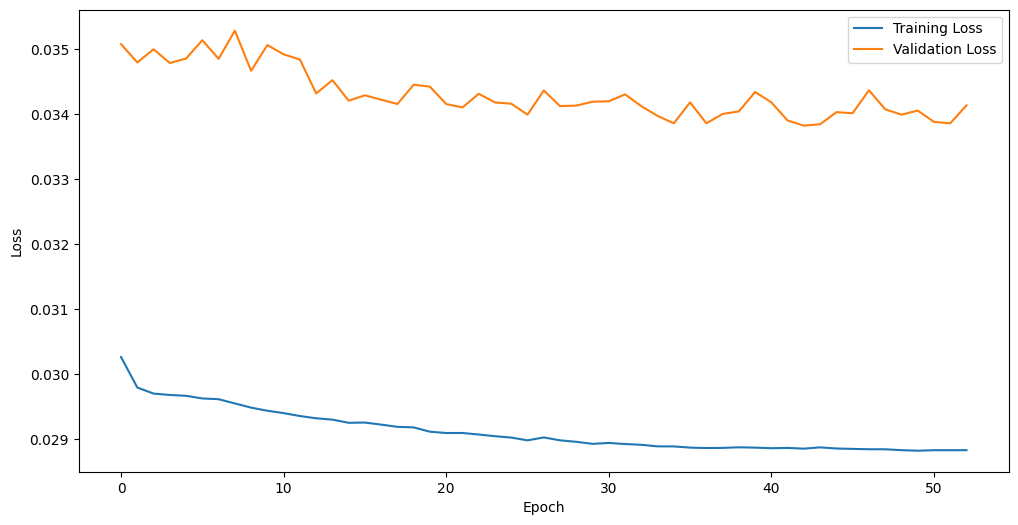

In [15]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

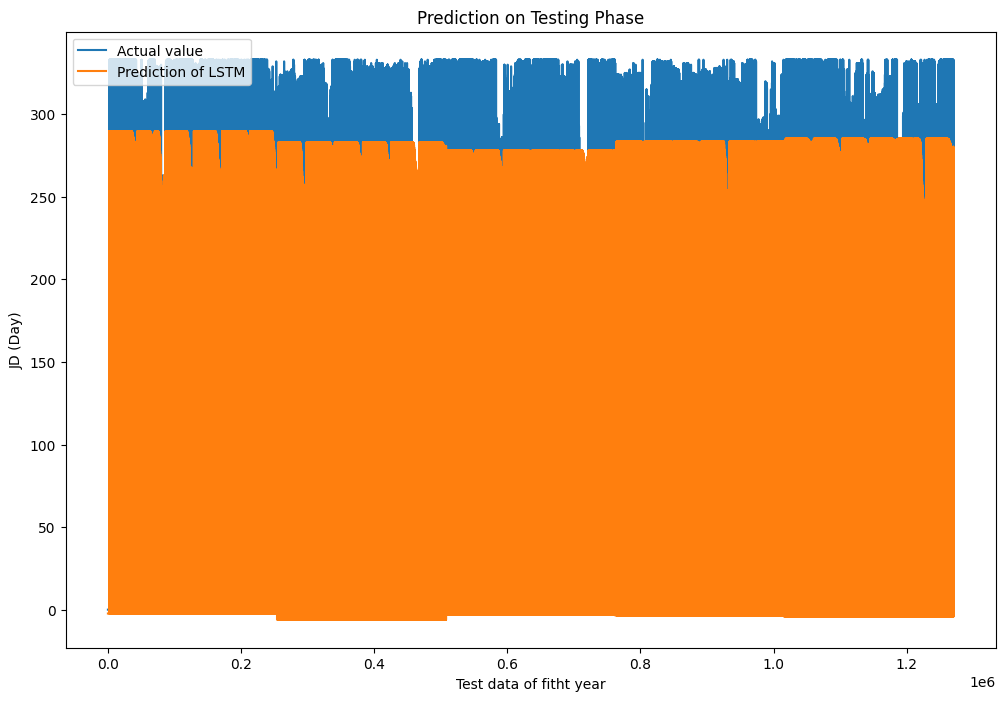

In [11]:
import matplotlib.pyplot as plt
predictions_denormalized_array = predictions_denormalized.reshape(-1)
#See the model performance on test dataset
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(y_test_denormalized, label='Actual value')
plt.plot(predictions_denormalized_array, label='Prediction of LSTM')
plt.legend(loc ="upper left")
plt.title('Prediction on Testing Phase')
plt.xlabel('Test data of fitht year')
plt.ylabel('JD (Day)')
plt.show()

In [127]:
from keras.optimizers import Adam
from keras.layers import Bidirectional, LSTM
from keras.callbacks import EarlyStopping
# Define LSTM model
model = Sequential([
    LSTM(units=64, activation='relu', input_shape=(1, X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(units=128, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(units=128, activation='relu'),
    Dropout(0.3),
    Dense(units=1)
])

# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Use EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [128]:
# Train the model LSTM
history = model.fit(X_train, y_train, epochs=200, batch_size=256, validation_split=0.2, callbacks=[early_stopping])   

Epoch 1/200
2779/2779 [==============================] - 159s 21ms/step - loss: 0.0294 - accuracy: 0.0180 - val_loss: 0.0194 - val_accuracy: 0.0017
Epoch 2/200
2779/2779 [==============================] - 53s 19ms/step - loss: 0.0274 - accuracy: 0.0179 - val_loss: 0.0198 - val_accuracy: 0.0018
Epoch 3/200
2779/2779 [==============================] - 56s 20ms/step - loss: 0.0271 - accuracy: 0.0182 - val_loss: 0.0201 - val_accuracy: 0.0017
Epoch 4/200
2779/2779 [==============================] - 50s 18ms/step - loss: 0.0270 - accuracy: 0.0182 - val_loss: 0.0190 - val_accuracy: 0.0017
Epoch 5/200
2779/2779 [==============================] - 48s 17ms/step - loss: 0.0269 - accuracy: 0.0182 - val_loss: 0.0194 - val_accuracy: 0.0017
Epoch 6/200
2779/2779 [==============================] - 50s 18ms/step - loss: 0.0267 - accuracy: 0.0182 - val_loss: 0.0210 - val_accuracy: 0.0018
Epoch 7/200
2779/2779 [==============================] - 49s 17ms/step - loss: 0.0267 - accuracy: 0.0182 - val_loss: 

In [109]:
# Save model
model.save("1000_epoch.keras")

11907/11907 [==============================] - 44s 4ms/step - loss: 0.0259 - accuracy: 0.0116
Test Loss: [0.025916585698723793, 0.011618690565228462]


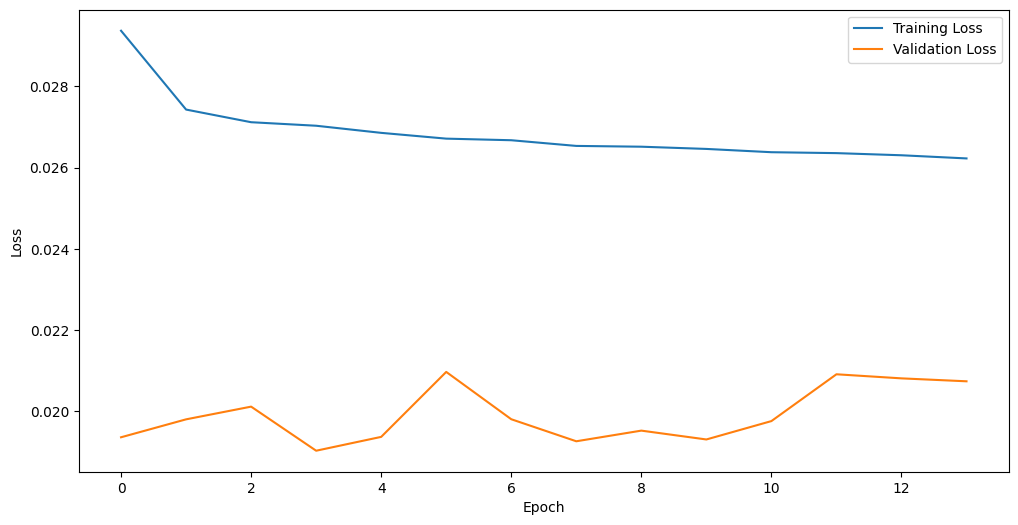

In [131]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
# Load model
model = tf.keras.models.load_model("1000_epoch.keras")


In [129]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
# Calculate RMSE, R-squared, and Pearson Correlation Coefficient
predictions = model.predict(X_test)
predictions_denormalized = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
y_test_denormalized = scaler_y.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

rmse = np.sqrt(mean_squared_error(y_test_denormalized.flatten(), predictions_denormalized.flatten()))
r2 = r2_score(y_test_denormalized.flatten(), predictions_denormalized.flatten())
correlation_coefficient, _ = pearsonr(y_test_denormalized.flatten(), predictions_denormalized.flatten())

# Calculate MAPE using the filtered data
mape = mean_absolute_percentage_error(y_test_denormalized.flatten(), predictions_denormalized.flatten())


print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'MAPE:{mape*100}%')

11907/11907 [==============================] - 46s 4ms/step
RMSE: 24.46980618437731
R^2: 0.17153377244696244
Pearson Correlation Coefficient: 0.4248314915238421
MAPE:5.503055819032973%


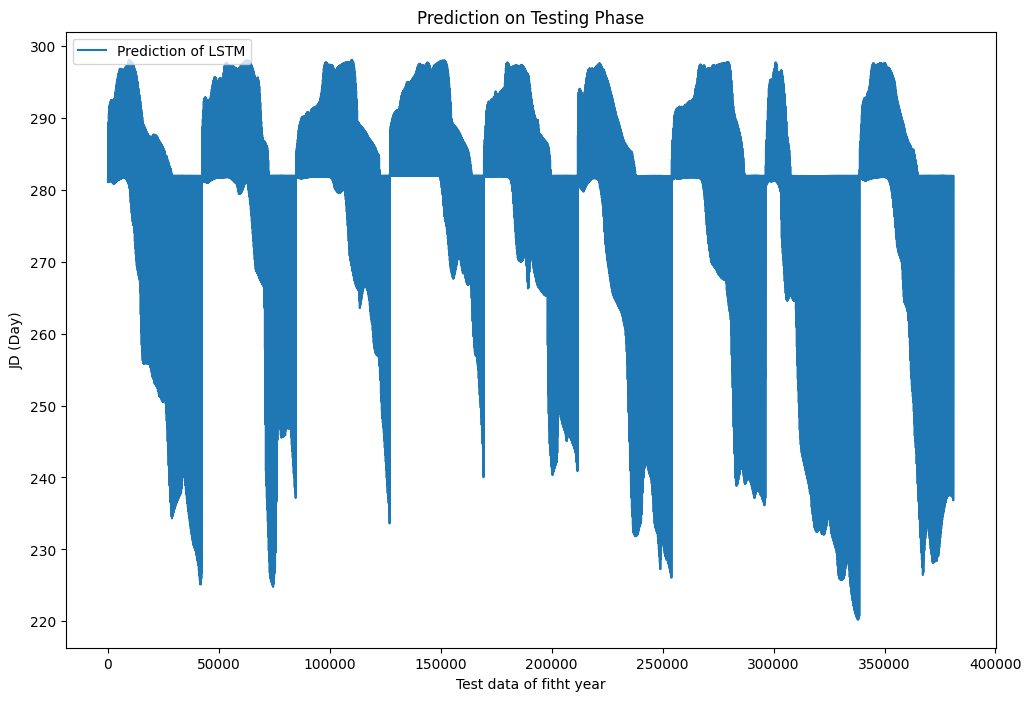

In [130]:
import matplotlib.pyplot as plt
predictions_denormalized_array = predictions_denormalized.reshape(-1)
#See the model performance on test dataset
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(predictions_denormalized_array, label='Prediction of LSTM')
# plt.plot(y_test_denormalized, label='Actual value')
plt.legend(loc ="upper left")
plt.title('Prediction on Testing Phase')
plt.xlabel('Test data of fitht year')
plt.ylabel('JD (Day)')
plt.show()

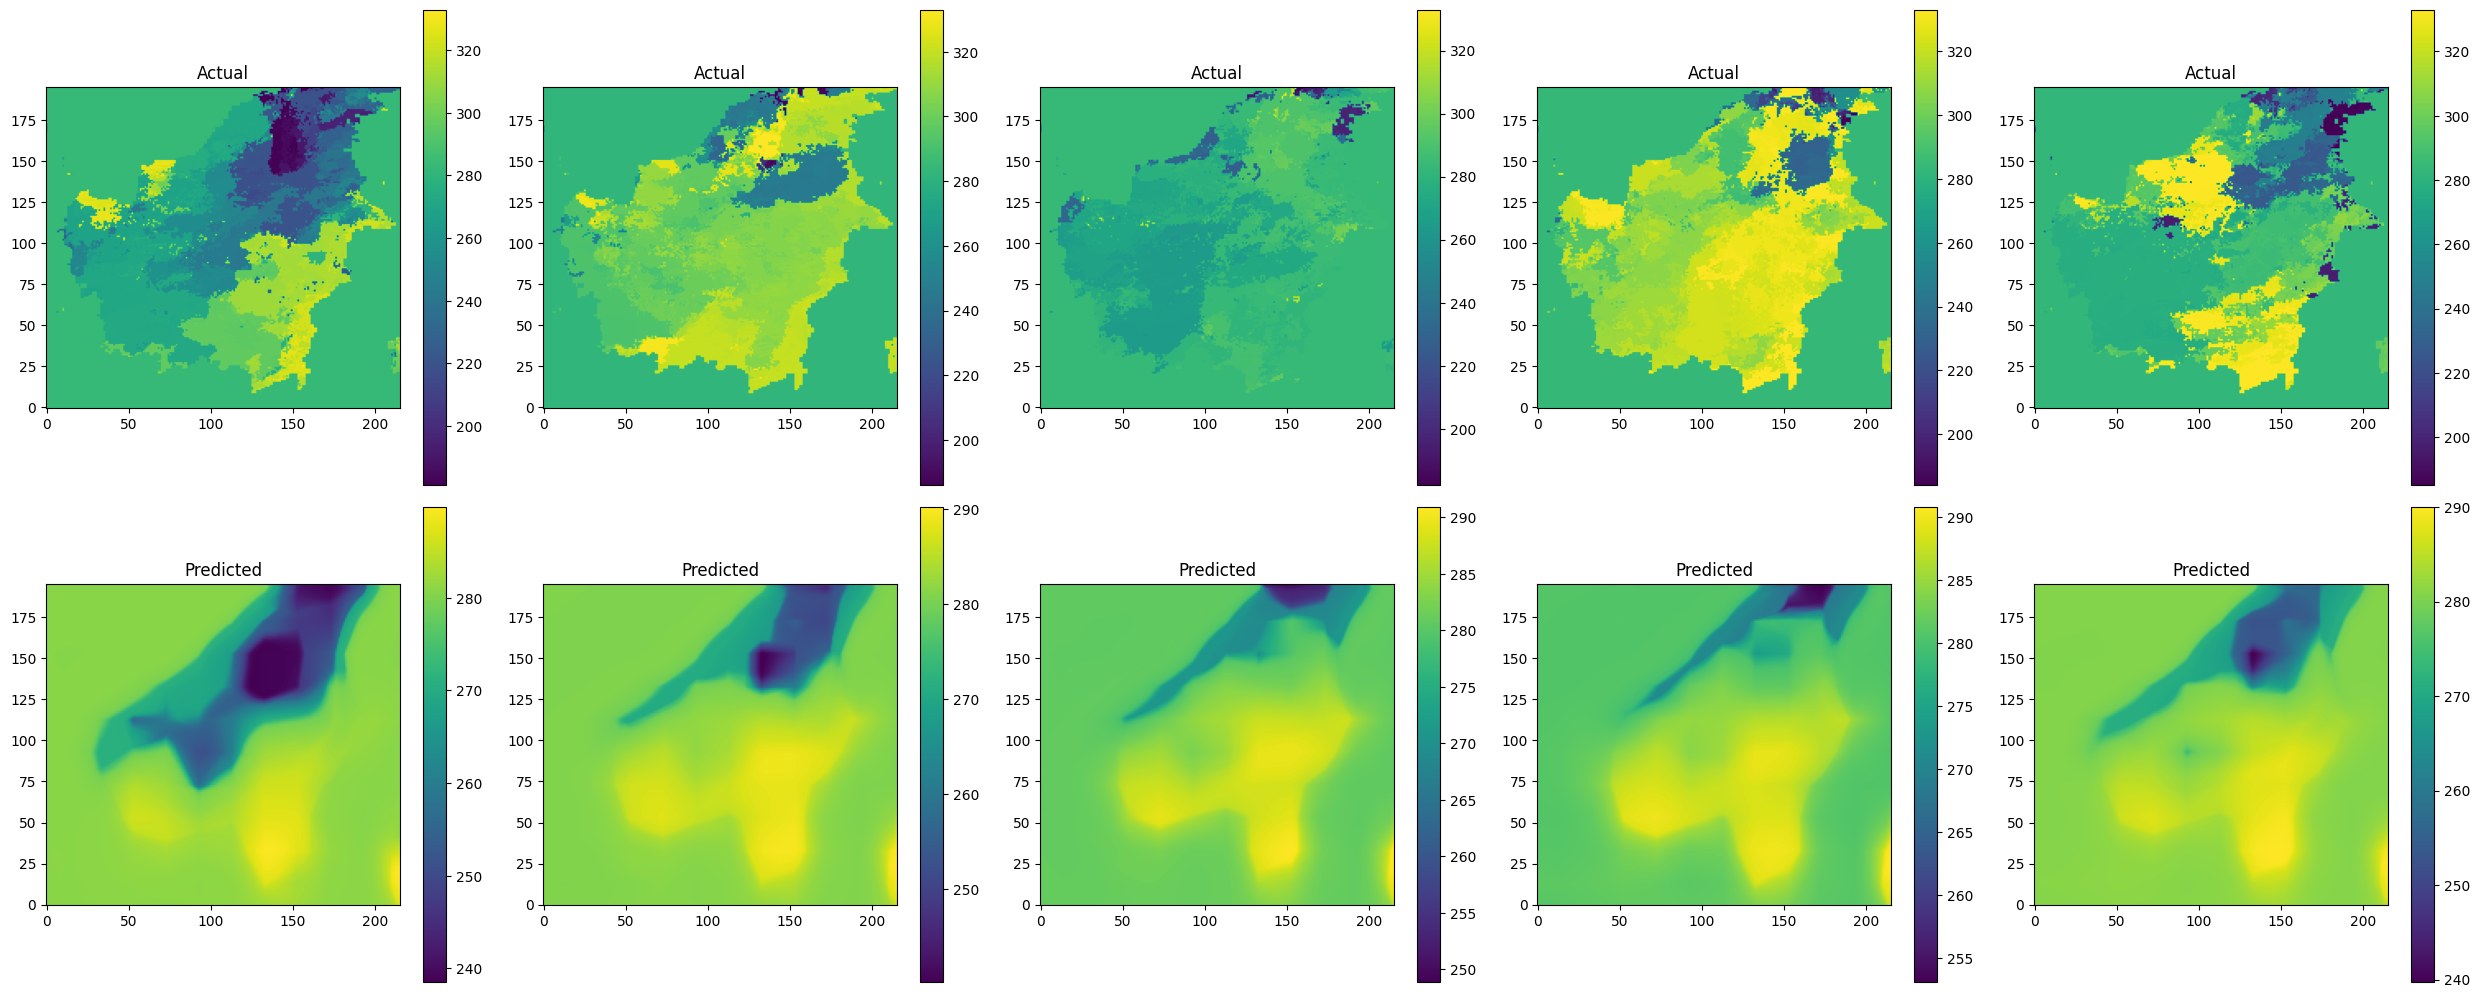

In [112]:
y_test_denormalized_peta = y_test_denormalized.reshape(9,196,216)
predictions_denormalized_peta = predictions_denormalized.reshape(9,196,216)

# prediction_denormalized_scale[mask_nan_prediksi] = np.nan
# y_test_denormalized_peta[mask_nan_var7] = np.nan
# predictions_denormalized_peta[mask_nan_var7] = np.nan
# Visualize some sample predictions

# Define the range for the last 5 years
n_samples_to_plot = 5
plt.figure(figsize=(25, 15))
for i in range(n_samples_to_plot):
    plt.subplot(3, n_samples_to_plot, i + 1)
    plt.imshow(y_test_denormalized_peta[i, :, :], cmap='viridis')
    plt.title('Actual')
    plt.colorbar()
    plt.gca().invert_yaxis()
    
    plt.subplot(3, n_samples_to_plot, n_samples_to_plot + i + 1)
    plt.imshow(predictions_denormalized_peta[i, :, :], cmap='viridis')
    plt.title('Predicted')
    plt.colorbar()
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

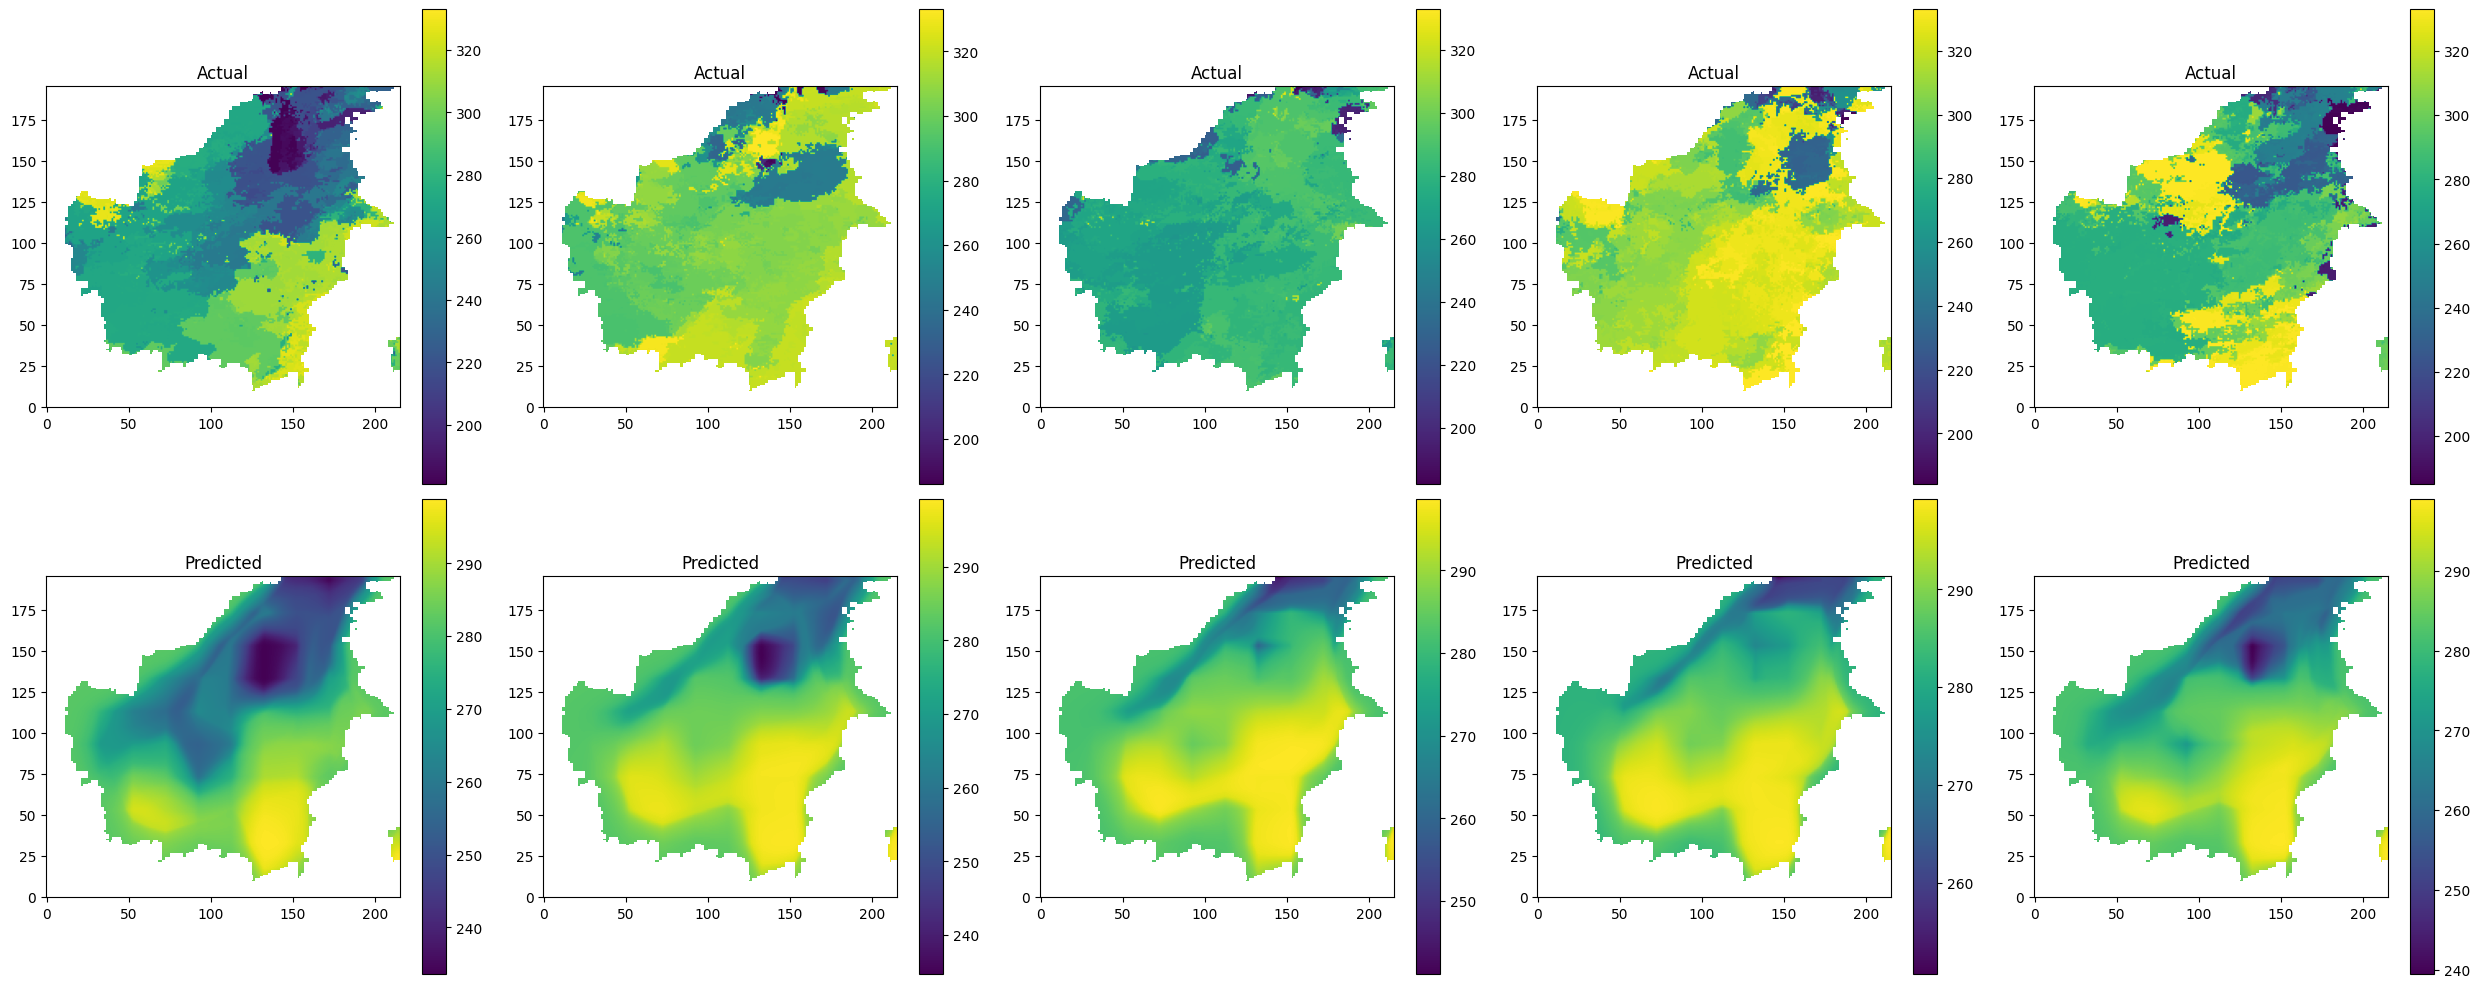

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the arrays y_test_denormalized and predictions_denormalized are already defined
y_test_denormalized_peta = y_test_denormalized.reshape(9, 196, 216)
predictions_denormalized_peta = predictions_denormalized.reshape(9, 196, 216)

y_test_denormalized_peta[mask_nan_var7] = np.nan
predictions_denormalized_peta[mask_nan_var7] = np.nan

# Visualize some sample predictions
n_samples_to_plot = 5
fig, axes = plt.subplots(2, n_samples_to_plot, figsize=(25, 10), squeeze=False)

for i in range(n_samples_to_plot):
    ax = axes[0, i]
    im = ax.imshow(y_test_denormalized_peta[i, :, :], cmap='viridis')
    ax.set_title('Actual')
    ax.invert_yaxis()
    fig.colorbar(im, ax=ax)

    ax = axes[1, i]
    im = ax.imshow(predictions_denormalized_peta[i, :, :], cmap='viridis')
    ax.set_title('Predicted')
    ax.invert_yaxis()
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [42]:
average_aktial = np.mean(y_test_denormalized_peta, axis=(1,2))
average_prediksi = np.mean(predictions_denormalized_peta, axis=(1,2))


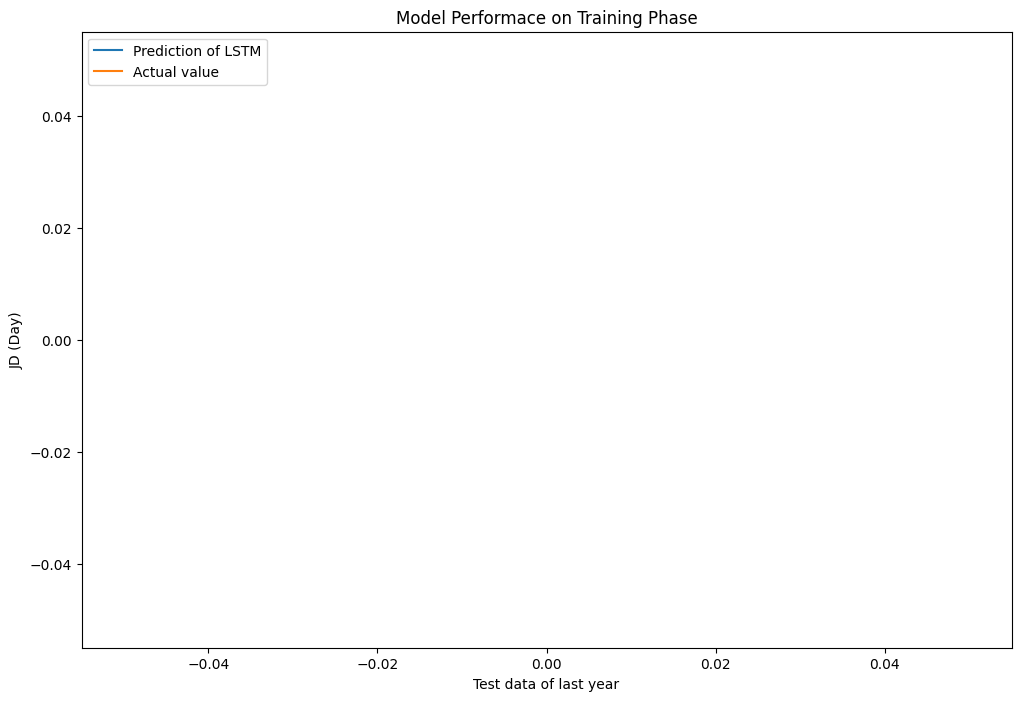

In [43]:
import matplotlib.pyplot as plt
#See the model performance on test dataset
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(average_prediksi[1:], label='Prediction of LSTM')
plt.plot(average_aktial[:-1], label='Actual value')
plt.legend(loc ="upper left")
plt.title('Model Performace on Training Phase')
plt.xlabel('Test data of last year')
plt.ylabel('JD (Day)')
plt.show()

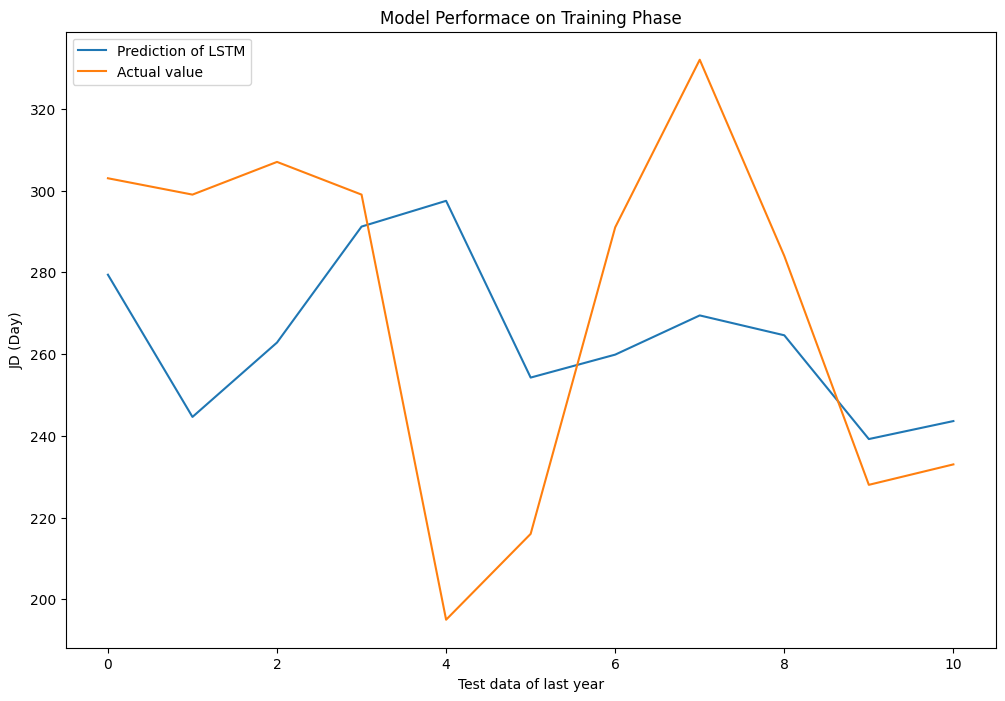

In [118]:
import matplotlib.pyplot as plt
#See the model performance on test dataset
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(predictions_denormalized_peta[1:,20,22], label='Prediction of LSTM')
plt.plot(y_test_denormalized_peta[:-1, 20,22], label='Actual value')
plt.legend(loc ="upper left")
plt.title('Model Performace on Training Phase')
plt.xlabel('Test data of last year')
plt.ylabel('JD (Day)')
plt.show()

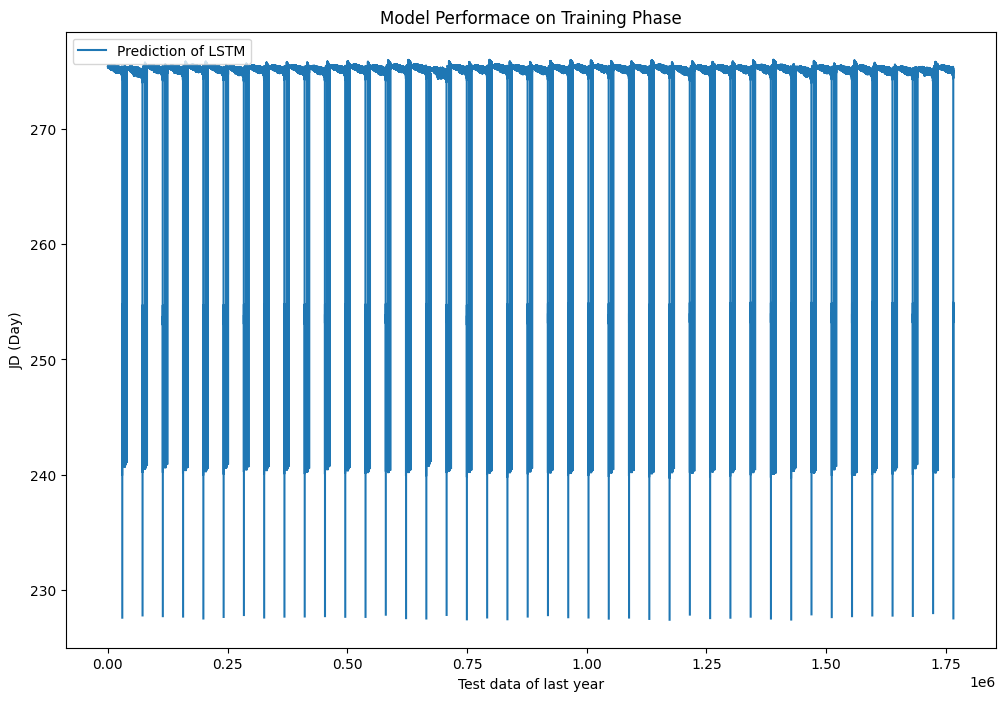

In [75]:
prediksiii = predictions_denormalized_peta.reshape(-1)
actiall = y_test_denormalized_peta.reshape(-1)

import matplotlib.pyplot as plt
#See the model performance on test dataset
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(prediksiii[12320:], label='Prediction of LSTM')
# plt.plot(actiall[10560:19360], label='Actual value')
plt.legend(loc ="upper left")
plt.title('Model Performace on Training Phase')
plt.xlabel('Test data of last year')
plt.ylabel('JD (Day)')
plt.show()

In [45]:
# Prepare data for prediction (latest two years data)
latest_years_data = np.stack([rain_september[-1:], rain_oktober[-1:], rain_november[-1:], temp_september[-1:], temp_oktober[-1:], temp_november[-1:]], axis=-1)
latest_years_data_normalized = scaler_x.transform(latest_years_data.reshape(-1, latest_years_data.shape[-1])).reshape(latest_years_data.shape)

latest_years_data_flattened = latest_years_data_normalized.reshape(-1, latest_years_data_normalized.shape[3])
latest_years_data_pca = pca.transform(latest_years_data_flattened).reshape(-1, n_steps, 4)

NameError: name 'rain_september' is not defined

In [86]:
# Make prediction
prediction_normalized = model.predict(latest_years_data_pca)
prediction_denormalized = scaler_y.inverse_transform(prediction_normalized)

print(f'Predicted early rain season for next year: {prediction_denormalized}')

55/55 [==============================] - 1s 8ms/step
Predicted early rain season for next year: [[282.24567]
 [282.26816]
 [282.28363]
 ...
 [293.12796]
 [282.00583]
 [282.3241 ]]


In [113]:
data = xr.open_dataset('Data05FIXXXXX.nc')

mask_test = data['AMH'][:9,:,:]
mask_nan_var7 = np.isnan(mask_test)

Mask_prediksi = data['AMH'][-1,:,:]
mask_nan_prediksi = np.isnan(Mask_prediksi)

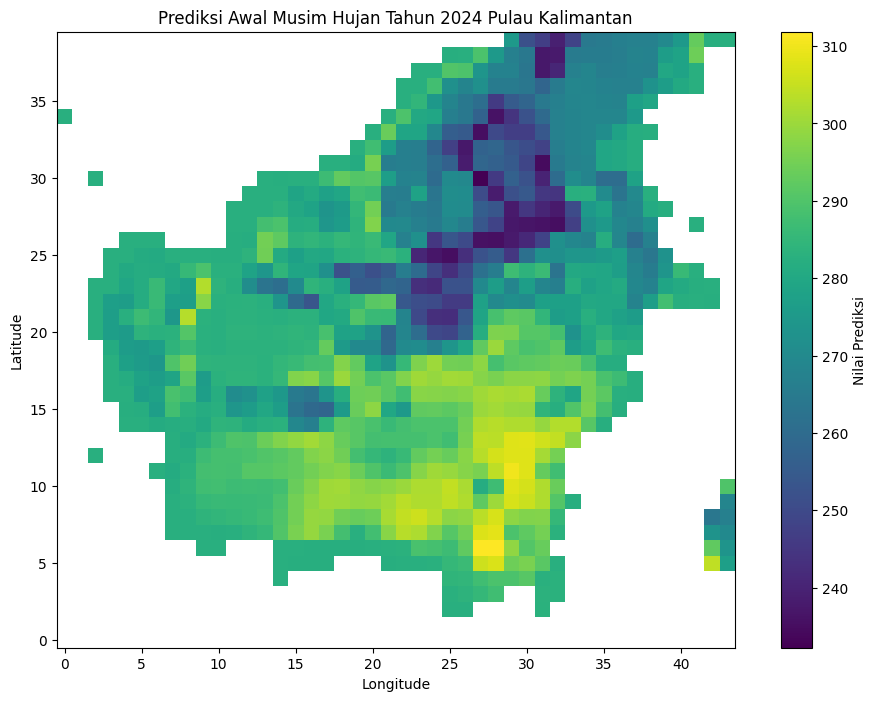

In [87]:
prediction_denormalized_scale = prediction_denormalized.reshape(40,44)
prediction_denormalized_scale[mask_nan_prediksi] = np.nan
# Buat plot spasial
plt.imshow(prediction_denormalized_scale, cmap='viridis')  # Ubah colormap sesuai kebutuhan
plt.colorbar(label='Nilai Prediksi')
plt.title('Prediksi Awal Musim Hujan Tahun 2024 Pulau Kalimantan' )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().invert_yaxis()
plt.show()